<center> <h1>SFML-Project-Regression-INFO-F422</h1> </center>

<center> <h2>Bernard Manderick</h2> </center>
 
<center> <h3>Guillaume Buisson-Chavot</h3> </center> 
<center> <h3>matricule: 000465822 </h3> </center> 

Question: We want to know if there is a difference between 2 machine learning algorithms in terms of errors.

For that, we will create a synthetic set in order to test the 2 algorithms on it before to apply them on a real-world dataset.

## 1. Synthetic dataset

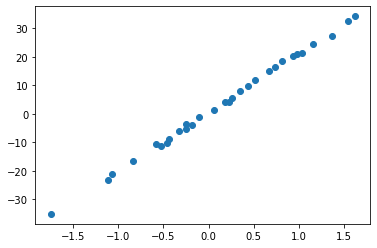

In [109]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=30, n_features=1, n_informative=10,
                    n_targets=1, bias=0.7, effective_rank=None,
                    tail_strength=0.5, noise=0.6, shuffle=True, coef=False,
                    random_state=100)
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

## 1.1 Decision Tree Regression on synthetic set

In [110]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 


DecisionTreeRegressor(random_state=0)

In [111]:
y_pred = regressor.predict([[1]])
print(y_pred)

[21.12668595]


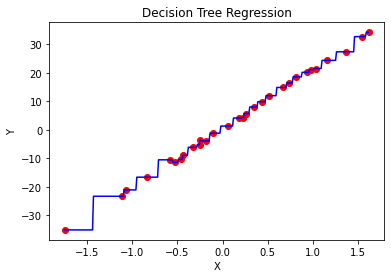

In [112]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 

X_grid = np.arange(min(X), max(X), 0.01) 
  
# reshape for reshaping the data into  
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
# scatter plot for original data 
plt.scatter(X, y, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  
plt.title('Decision Tree Regression')   
plt.xlabel('X') 
plt.ylabel('Y') 
plt.show() 


Now, I split the set in training(70%) and test(30%) sets in order to evaluate the score of the regressor:

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.3)
regr_DT = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)
regr_DT.predict(X_test[:2])

array([ -1.14623514, -11.40384336])

In [114]:
regr_DT.score(X_test, y_test)

0.9623280562929744

And finally, I just plot the Decision Tree:

[Text(162.91607142857143, 203.85, 'X[0] <= 0.058\nmse = 342.177\nsamples = 21\nvalue = 3.239'),
 Text(65.76428571428572, 176.67000000000002, 'X[0] <= -0.687\nmse = 101.392\nsamples = 10\nvalue = -13.422'),
 Text(23.914285714285715, 149.49, 'X[0] <= -1.434\nmse = 46.875\nsamples = 4\nvalue = -24.032'),
 Text(11.957142857142857, 122.31, 'mse = 0.0\nsamples = 1\nvalue = -35.128'),
 Text(35.871428571428574, 122.31, 'X[0] <= -0.956\nmse = 7.778\nsamples = 3\nvalue = -20.333'),
 Text(23.914285714285715, 95.13, 'X[0] <= -1.094\nmse = 1.242\nsamples = 2\nvalue = -22.198'),
 Text(11.957142857142857, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = -23.312'),
 Text(35.871428571428574, 67.94999999999999, 'mse = -0.0\nsamples = 1\nvalue = -21.083'),
 Text(47.82857142857143, 95.13, 'mse = -0.0\nsamples = 1\nvalue = -16.605'),
 Text(107.61428571428571, 149.49, 'X[0] <= -0.392\nmse = 12.653\nsamples = 6\nvalue = -6.349'),
 Text(83.7, 122.31, 'X[0] <= -0.495\nmse = 0.285\nsamples = 2\nvalue = -10.8

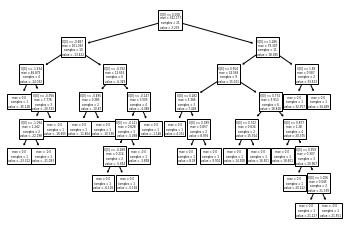

In [115]:
from sklearn import tree
tree.plot_tree(regr_DT)

## 1.1.1 Regression Tree explanation

Our data consists of p inputs and a response, for each of N observations: that is (xi, yi) for i = 1,2,...,N with xi = (xi1, xi2, ..., xip). The algorithm needs to automatically decide on the splitting variables and split points, and also what shape the Tree should have. Suppose first that we have a partition into M regions R1, R2, ..., RM and we model the response as a constant Cm in each region:

$$f(x)=\sum\limits_{m=1}^{M}C_m*I(x\in\mathbb{R_m})$$

If we adopt as our criterion minimization of the sum of squares    , it's easy to see that the best Ĉm is the average of yi in region Rm:

$$Ĉ_m= ave(y_i|x_i\in\mathbb{R_m})$$

Now finding the best binary partition in terms of minimum sum of squares is generally computationally infeasible. Hence we proceed with a greedy algorithm. Starting with all of the data, consider a splitting variable j and split point s and define the pair of half-planes

$$ R_1(j,s) =\left\{ X|X_j <= s\right\}$$ and $$R_2(j,s) = \left\{ X|X_j > s\right\}$$


Then we seek the splitting variable j and split point s that solve:

$$\min_{j,s}\left[\min_{C_1}\sum\limits_{xi\in\mathbb{R_1(j,s)}}(y_i-c_1)^2\\+\min_{C_2}\sum\limits_{x_i \in\mathbb{R_2(j,s)}}(y_i-c_2)^2\\\right]$$

for any choice j and s, the inner minimization is solved by:

$$Ĉ_1= ave(y_i|x_i\in\mathbb{R_1(j,s)})$$ and $$Ĉ_2= ave(y_i|x_i\in\mathbb{R_2(j,s)})$$

For each splitting variable, the determination of the split point s can be done very quickly and hence by scanning through all of the inputs, determination of the best pair (j,s) is feasible.
Having found the best split, we partion the data into two resulting regions and repeat the splitting process on each of the two regions. Then this process is repeated on all the resulting regions.
A very large tree might overfit the data while a small tree might not capture the important structure.

One approach to choose the optimal tree size is to grow a large tree T0, stopping the splitting process only when some minimum node size is reached. Then this large tree is pruned using cost-complexity pruning.

## 1.2 Neural Network regression on synthetic set

In [116]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.3)
regr_NN = MLPRegressor(random_state=1, max_iter=1000000).fit(X_train, y_train)
regr_NN.predict(X_test[:2])


array([  1.87629035, -12.80145433])

In [117]:
regr_NN.score(X_test, y_test)

0.9922327008092797

Conclusion: The NN regressor is better than the DT regressor for a bivariate set.

## 1.2.1 Neural Network regression explanation

In this link, there is a diagram representing a neural network: https://www.astroml.org/_images/fig_neural_network_1.png
We have a training set and from this, the goal is to find weights and parameters that best associate known inputs with a unique output. The inputs of our training set are N-uples, each encoding a different feature.The value of the nodes of the next layers are obtained as a function of the values of the nodes of the previous layer, the weights w and the bias b. For exemple with a sigmoid function:

$$V_j^{(a+1)}\\= \frac{1}{(1+ exp(\sum\limits_{i}(w_ij^{(a)}\\\cdotp V_i^{(a)}\\+b_j^{(a+1)}\\)}$$
with V always between 0 and 1.
Weights and bias values are initially random. Weights and biases are adjusted after the output has been calculated, on the basis of the deviation of the output from the 'true' solution. When the learning phase is complete, the weights and biases are kept fixed. They are used to compute the output for a new inputs.

## 2. Real-world dataset

In [118]:
real_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")
print(real_data.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

Here is the link corresponding to the features of our data: https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.names

We can read the following things for features:

- subject# - Integer that uniquely identifies each subject 
- age - Subject age
- sex - Subject gender '0' - male, '1' - female
- test_time - Time since recruitment into the trial. The integer part is the 
- number of days since recruitment.
- motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
- total_UPDRS - Clinician's total UPDRS score, linearly interpolated
- Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of 
- variation in fundamental frequency
- Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - 
- Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- RPDE - A nonlinear dynamical complexity measure
- DFA - Signal fractal scaling exponent
- PPE - A nonlinear measure of fundamental frequency variation 

Now, we have to check if there are NaN values:

In [119]:
real_data[:].isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

It means that we have noting to clean!

## 2.1 Decision Tree Regression on Real-world set

I decided to remove the first column which is not relevant for us.

In [120]:
real_data.drop(['subject#'], 1, inplace=True)

In [121]:
print(real_data.describe())

               age          sex    test_time  motor_UPDRS  total_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     64.804936     0.317787    92.863722    21.296229    29.018942   
std       8.821524     0.465656    53.445602     8.129282    10.700283   
min      36.000000     0.000000    -4.262500     5.037700     7.000000   
25%      58.000000     0.000000    46.847500    15.000000    21.371000   
50%      65.000000     0.000000    91.523000    20.871000    27.576000   
75%      72.000000     1.000000   138.445000    27.596500    36.399000   
max      85.000000     1.000000   215.490000    39.511000    54.992000   

         Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5   Jitter:DDP  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean      0.006154     0.000044     0.002987     0.003277     0.008962  ...   
std       0.005624     0.000036     0.003124     0.003732     0.009371  ...   
min       0.00083

I will try to predict the age in function of the others features:

In [122]:
X = np.array(real_data.drop(['age'], 1))
y = np.array(real_data['age'])

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)
regr_DT = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)
regr_DT.predict(X_test[:2])

array([55., 55.])

In [123]:
regr_DT.score(X_test, y_test)

0.7026048471720634

## 2.2 Neural Network regression on Real-world set

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)
regr_NN = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr_NN.predict(X_test[:2])

array([67.7062919 , 62.26306736])

In [125]:
regr_NN.score(X_test, y_test)

0.45217425441764725

Conclusion: We can see that the NN regressor is not very adapted to this kind of learning, the DT regressor give us best results. For a bivariate set, NN regressor is quasi perfect to predict a value but with a multivariate, it seems that it's not the case.